# Pandas Visualization

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [139]:
# Pandas uses Matplotlib under the hood.
# see the pre-defined styles provided.
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [140]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### DataFrame.plot

In [141]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


<IPython.core.display.Javascript object>


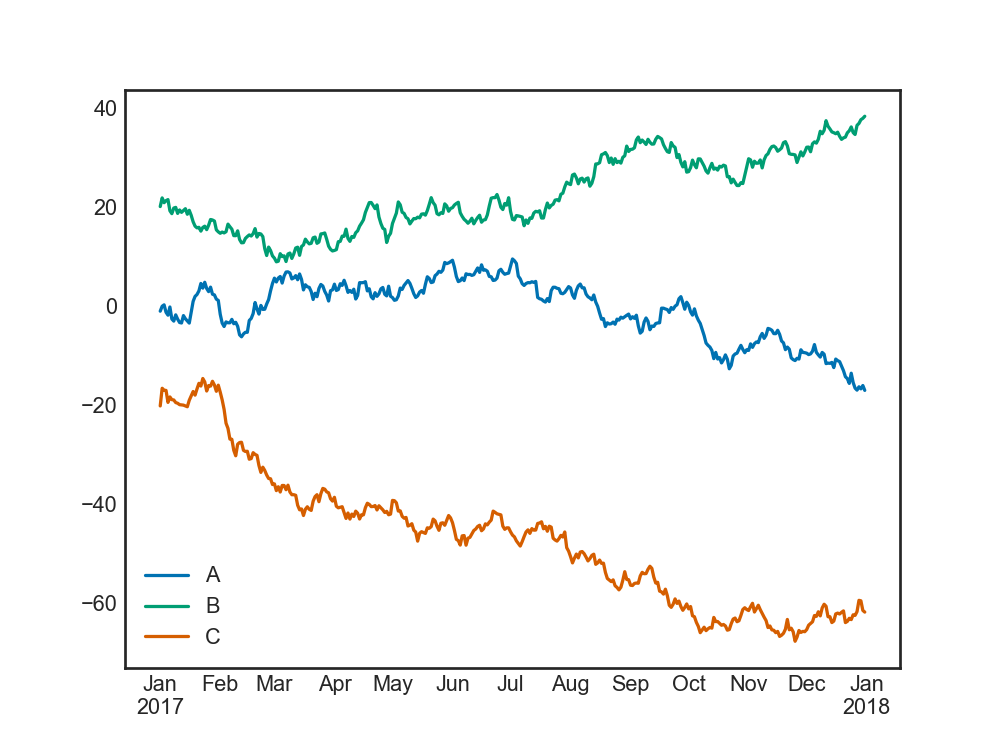

In [142]:
# The plot method on series and DataFrame is just a simple wrapper around plt.plot

df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

We can select which plot we want to use by passing it into the 'kind' parameter.

<IPython.core.display.Javascript object>


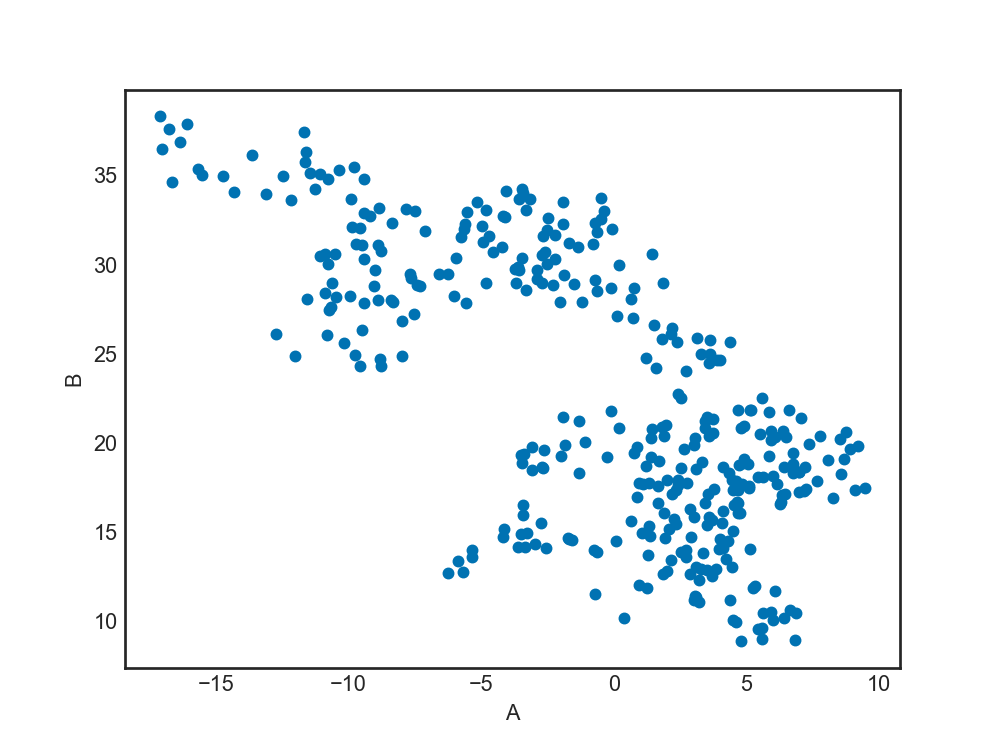

In [143]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

<IPython.core.display.Javascript object>


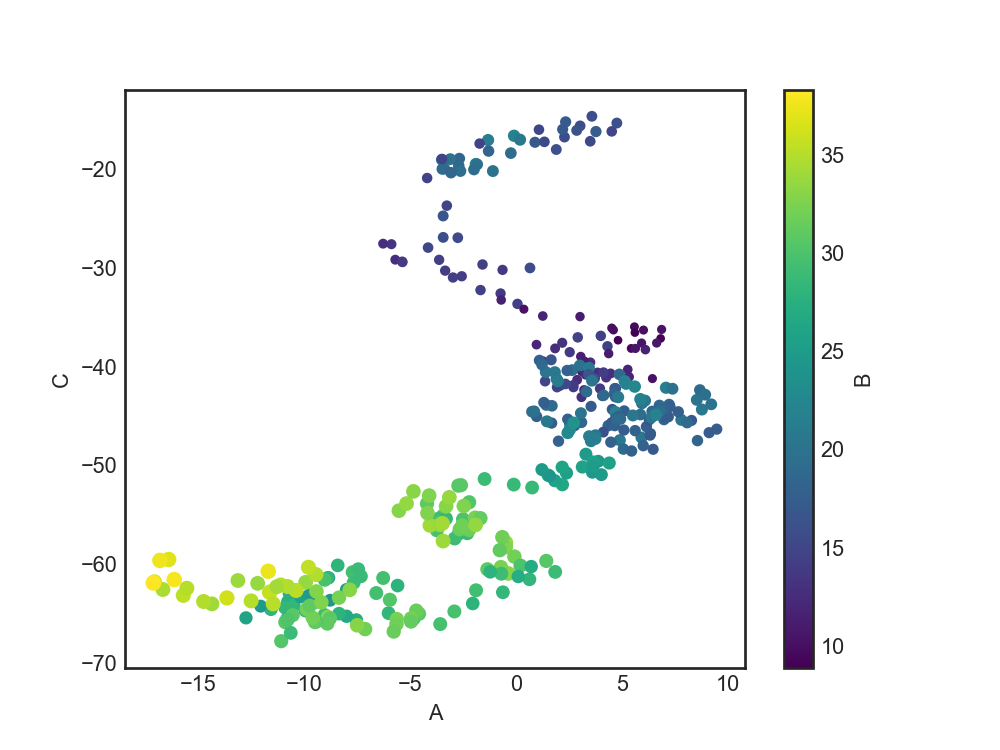

In [144]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis'); # .set_aspect('equal');

Because df.plot.scatter returns a matplotlib.axes._subplot, we can perform modification on this object just like objects returned by matplotlib plots.

For example, let's see what it looks like when we change the aspect ratio of the AxesSubplot to equal.

Setting the aspect ratio to equal allows the viewer to easily see that the range of series A is much smaller than series C.

<IPython.core.display.Javascript object>


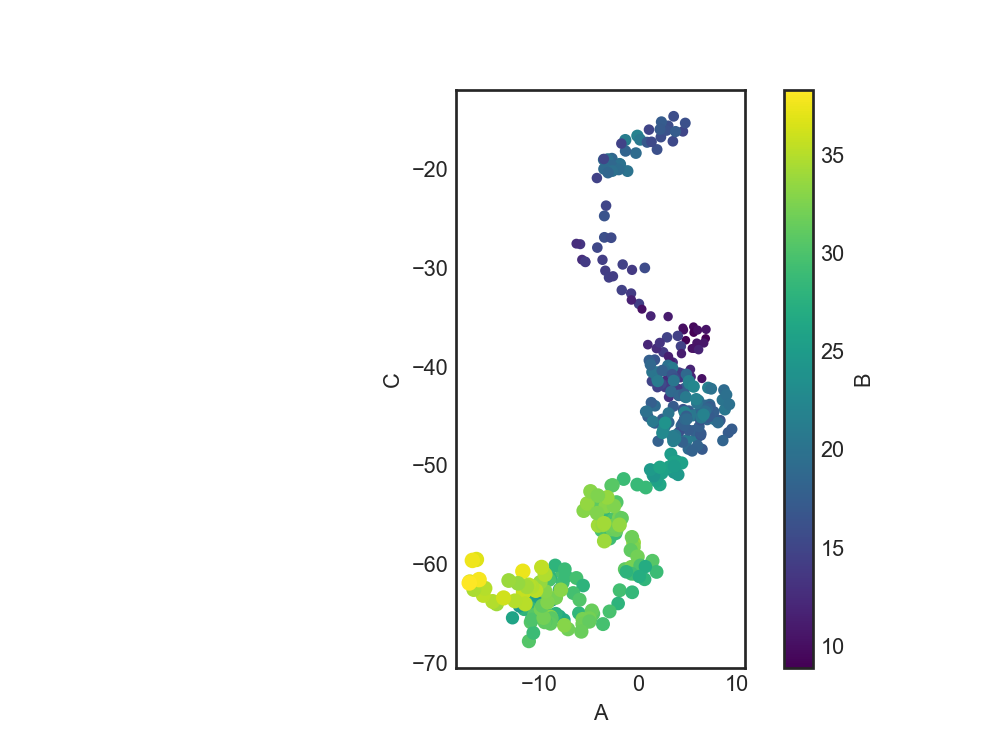

In [164]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')  # sets scale of each axis to be equal

<IPython.core.display.Javascript object>


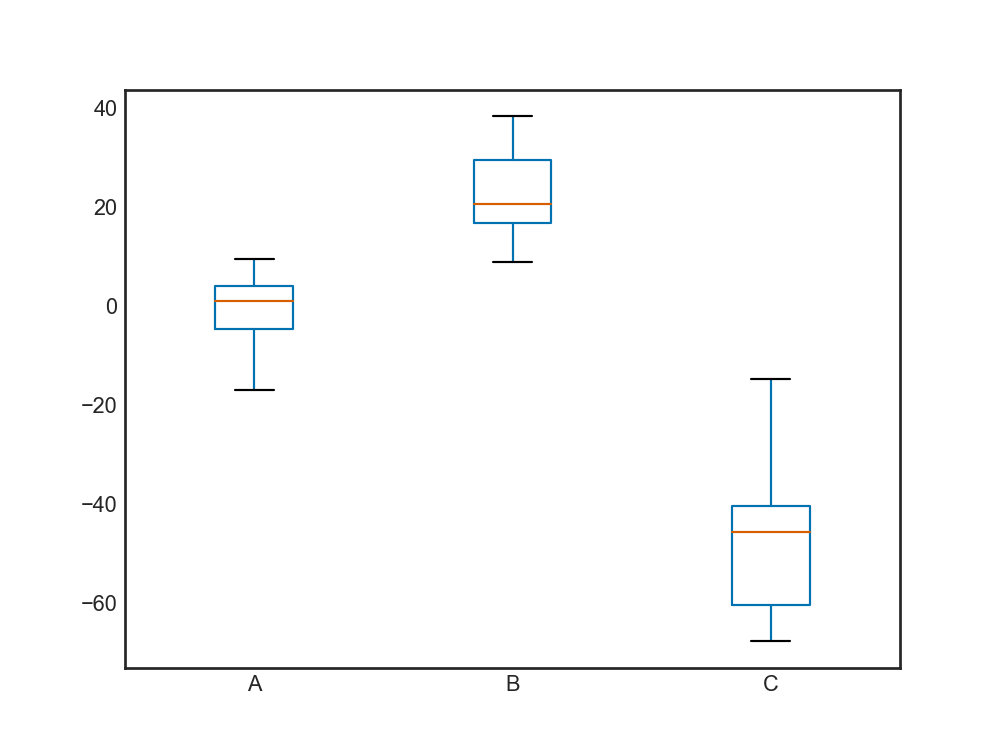

In [165]:
df.plot.box();

<IPython.core.display.Javascript object>


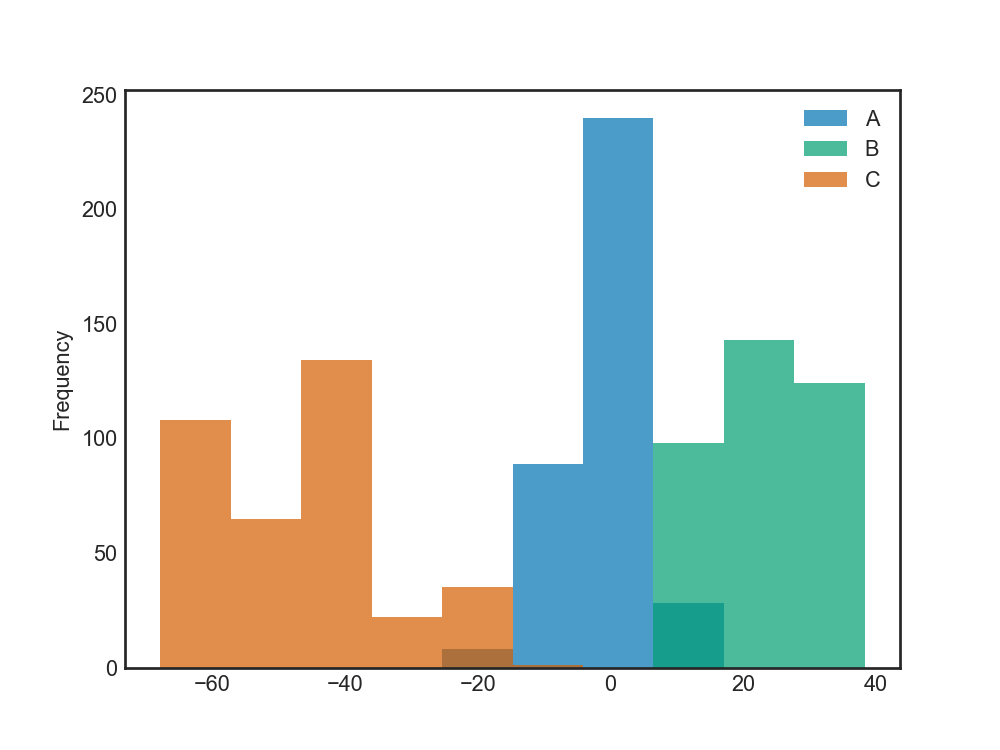

In [166]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

<IPython.core.display.Javascript object>


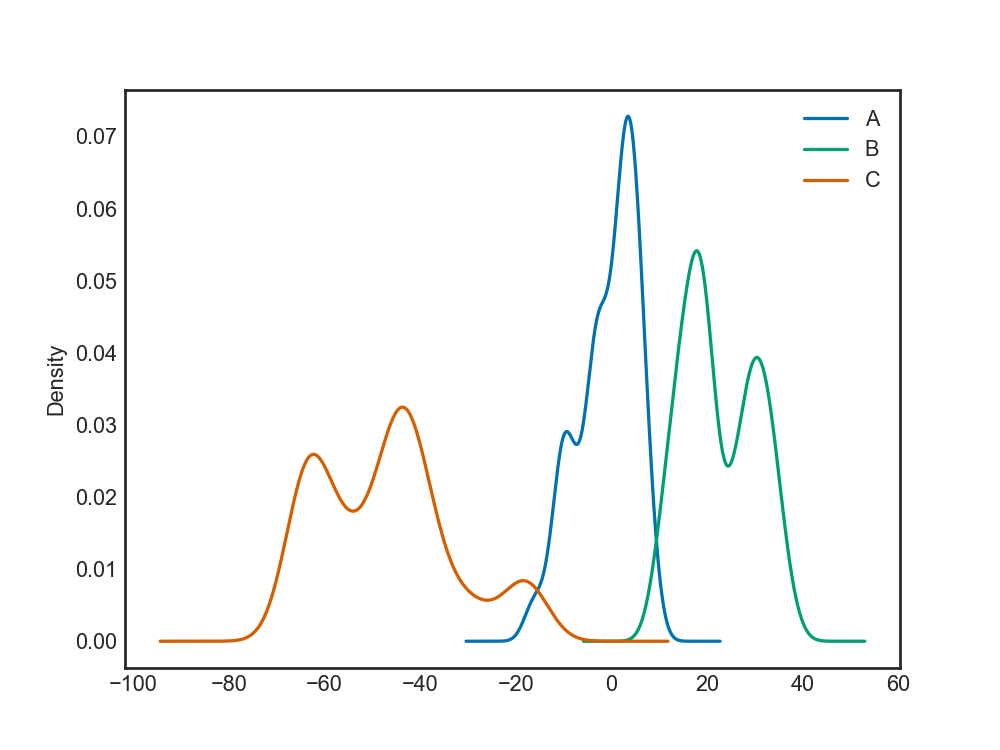

In [167]:
df.plot.kde();

### pandas.tools.plotting

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [168]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


A scatter matrix is a way of comparing each column in a DataFrame to every other column in a pairwise fashion. Let's use it to visualize the iris dataframe and see what insights we can gain from our data.

The scatter matrix creates scatter plots between the different variables and histograms along the diagonals. This is nothing more than a 4x4 grid of subplots with some plots histograms and the others scatterplots

<IPython.core.display.Javascript object>


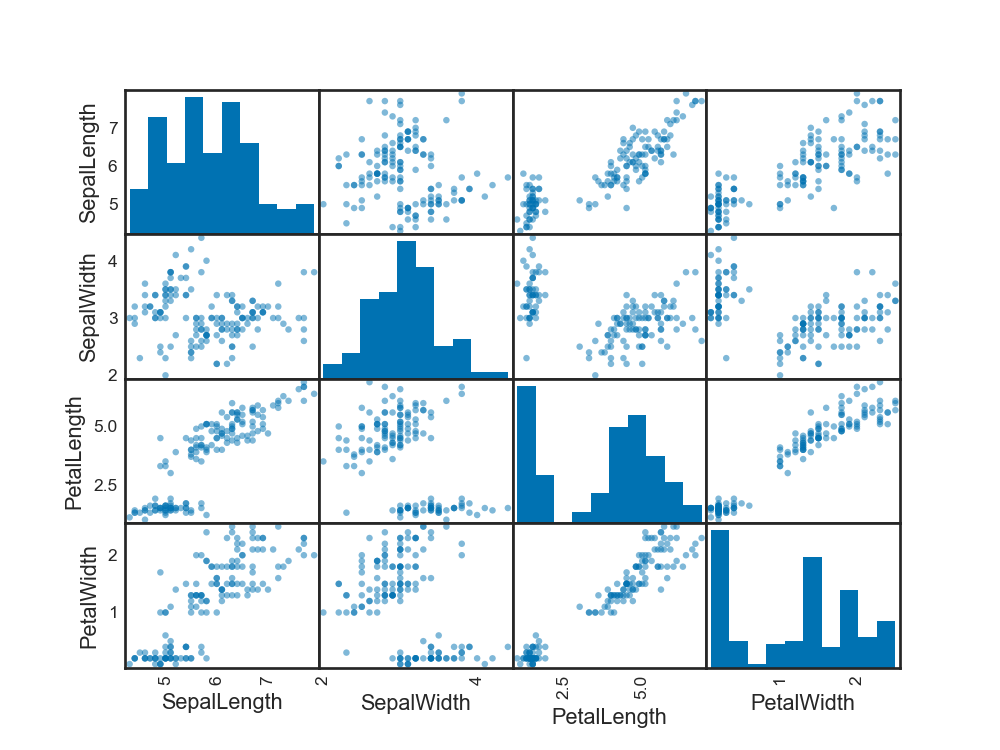

In [169]:
pd.plotting.scatter_matrix(iris);

Pandas includes a plotting tool for creating parallel coordinate plots.
Parallel coordinate plots are a common way of visualizing high dimensional multivariate data.

Each variable in the data set corresponds to an equally spaced parallel vertical line. The values of each variable are then connected by lines between for each individual observation.

Coloring the lines by class (i.e. categorical variable), in this example the species of flower, allows the viewer to more easily see any patterns or clustering.

<IPython.core.display.Javascript object>


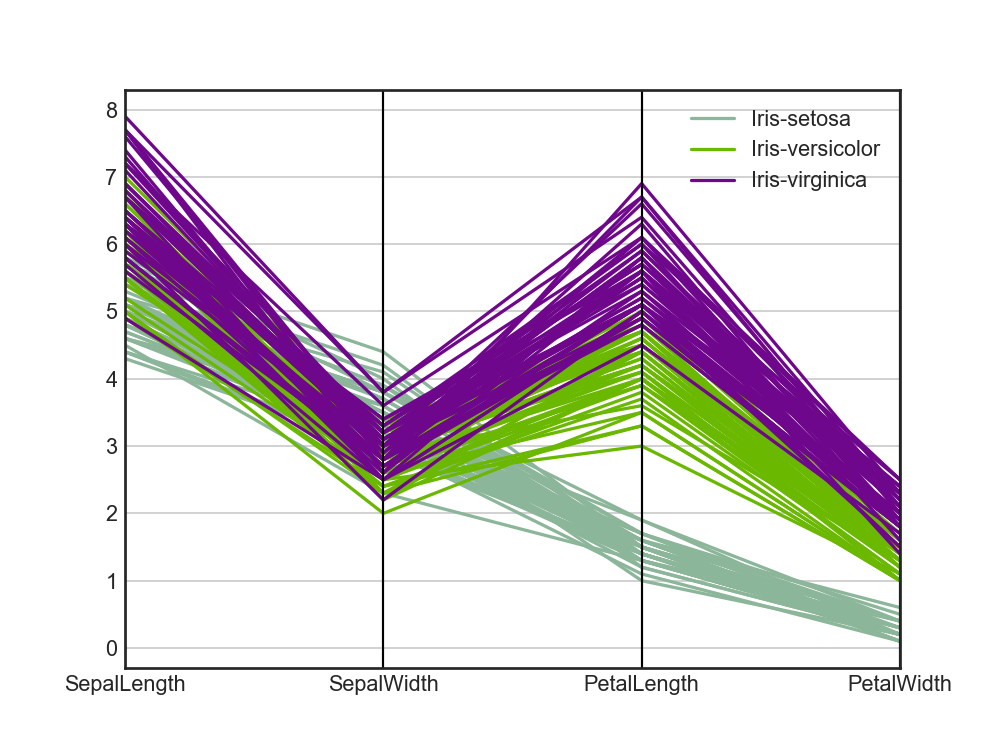

In [170]:
plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name');

# Seaborn

Seaborn is a wrapper around matplotlib. It adds styles to make default data visualizations much more visually appealing and makes creation of specific types of complicated plots much simpler.

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [172]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(v1*2 + np.random.normal(60,15,1000), name='v2')

<IPython.core.display.Javascript object>


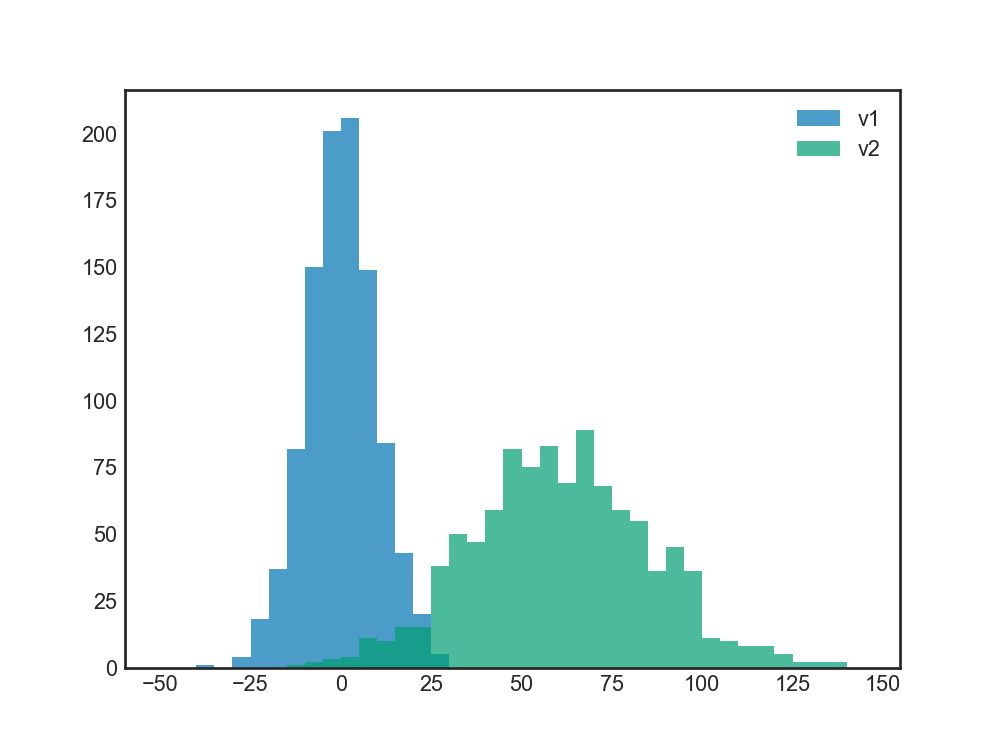

In [173]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

<IPython.core.display.Javascript object>


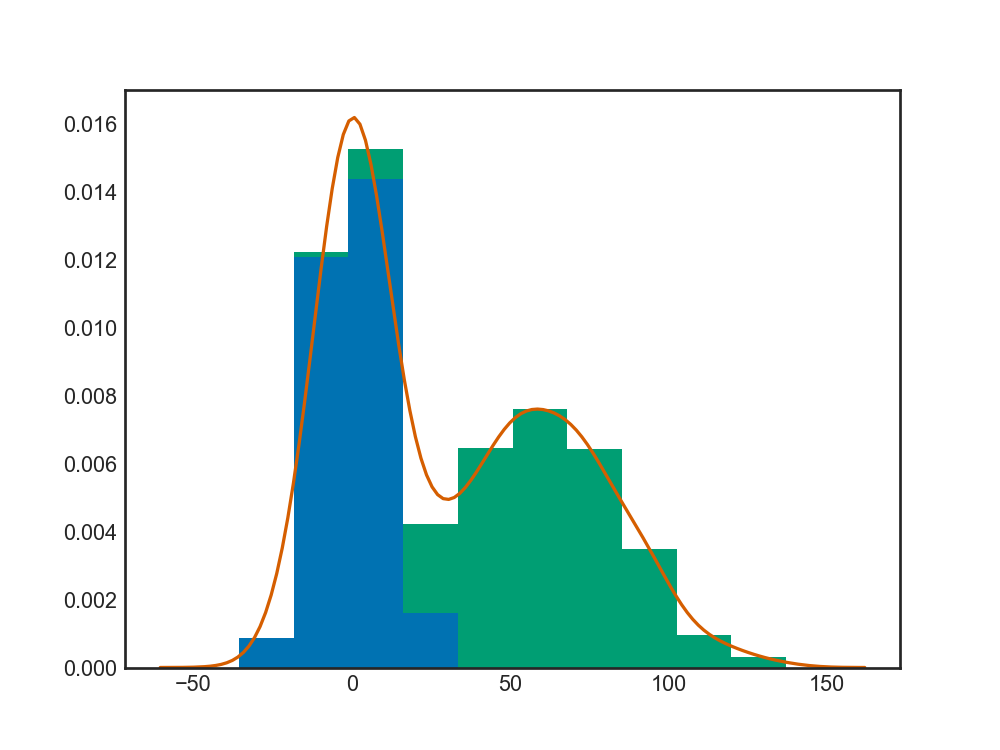

In [174]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', density=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

Seaborn has a function for viewing distributions histogram and kernal density estimate called sns.distplot()

<IPython.core.display.Javascript object>


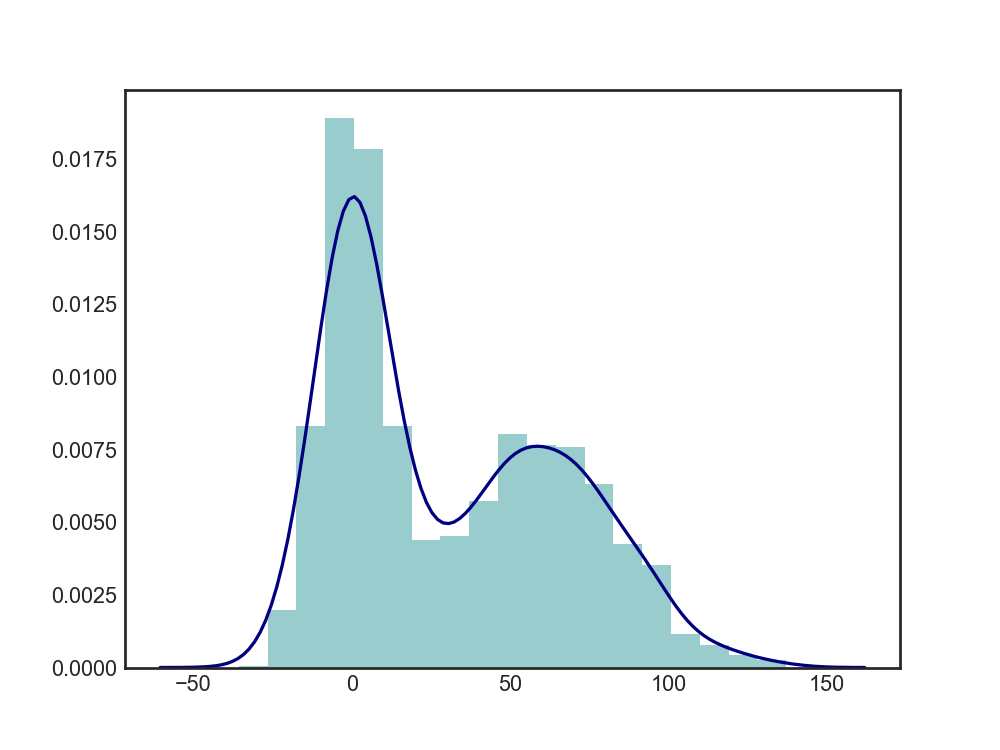

C:\Users\redex\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [175]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

The jointplot creates a scatterplot along the histograms for each individual variable on each axis.  You've actually seen jointplots in module two and created them manually yourself.
To create a jointplot, we just type sns.jointplot() and pass in the two series, v1 and v2.

<IPython.core.display.Javascript object>


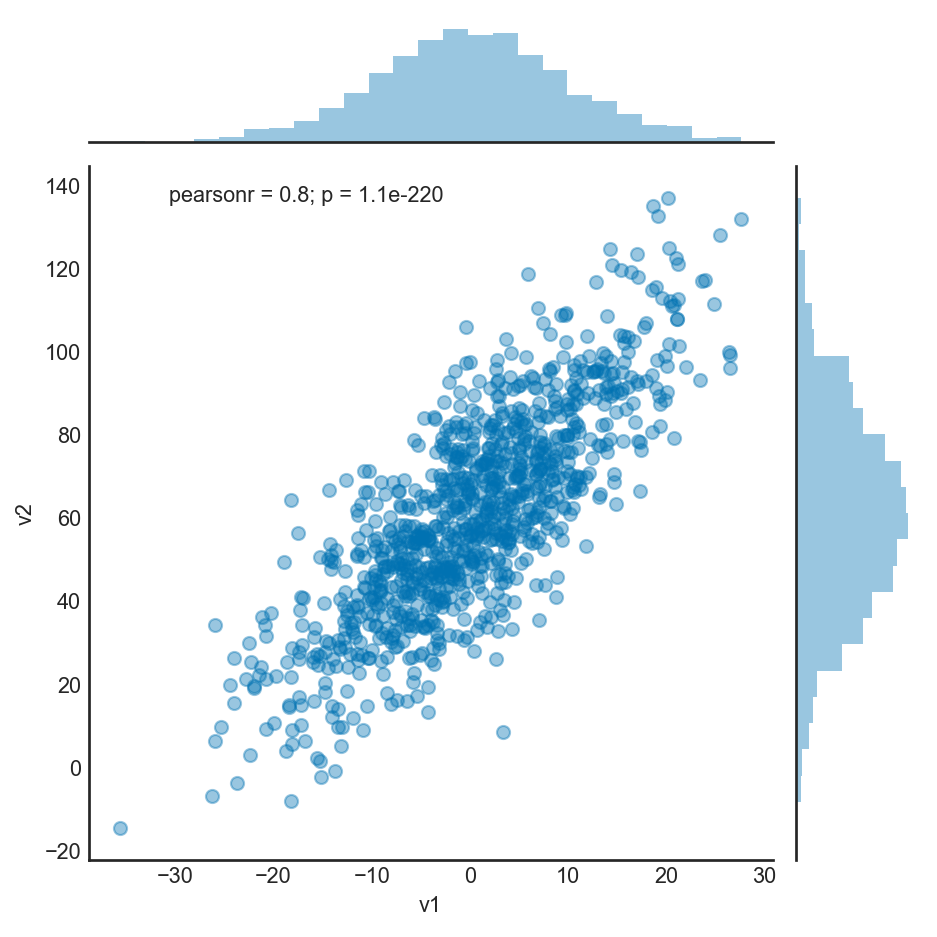

C:\Users\redex\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\redex\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [176]:
sns.jointplot(v1, v2, alpha=0.4); # .ax_joint.set_aspect('equal');

Some of the plotting functions in Seaborn return a matplotlib axes object. While others operate on an entire figure and produce plots with several panels, returning a Seaborn grid object.

In both cases, matplotlib can be used to further tweak the plots. For example, sns.jointplot returns a Seaborn grid object.

From this we can plot a matplotlib axes subplot object using grid.ax_joint.

Then, we can set the aspect ratio to be equal, using .set_aspect(equal).

<IPython.core.display.Javascript object>


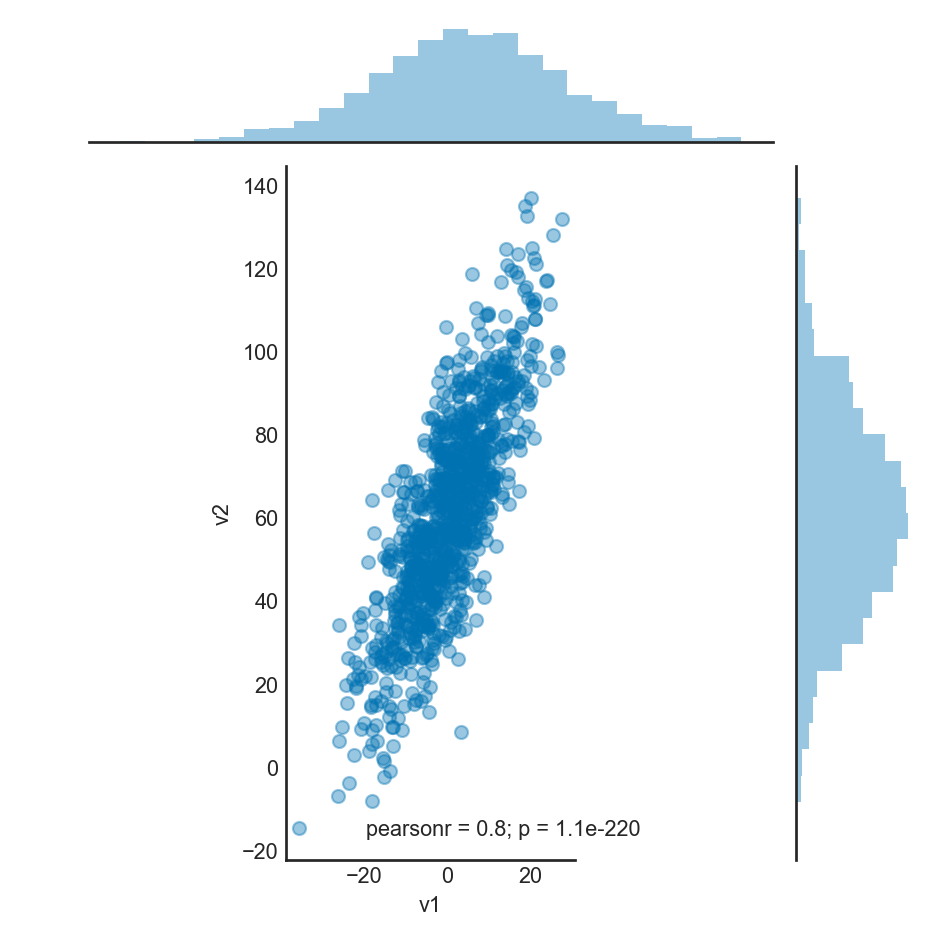

C:\Users\redex\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\redex\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [177]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

Hexbin plots are the bivariate counterpart to histograms. Hexbin plots show the number of observations that fall within hexagonal bins.

sns.jointplot includes the hex bin style we can use by passing in hex to the kind parameter.

The hexbin style of plot works well with relatively large data sets. 

<IPython.core.display.Javascript object>


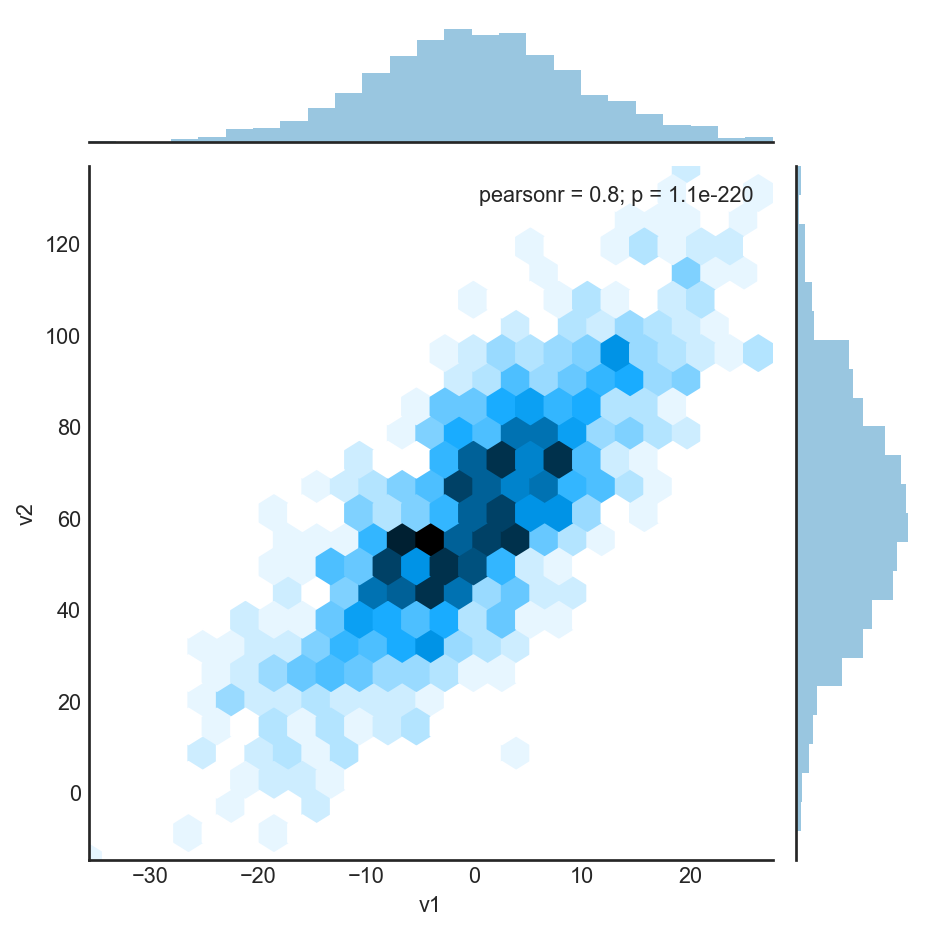

C:\Users\redex\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\redex\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [178]:
sns.jointplot(v1, v2, kind='hex');

Another good option for visualizing the distribution of data sets is kernel density estimations or KDE plots. You can think of two dimensional KDE plots as the continuous version of the hexbin jointplot.

First, let's tell Seaborn to use a different style using sns.set_style('white'). All of the following charts will have the gray grid turned off.

Now we'll create a joint plot just like before, except this time, let's set the kind to kde.

Finally, let's set space to 0, which will plot the kernal density plots directly on the border of the scatter plot.

<IPython.core.display.Javascript object>


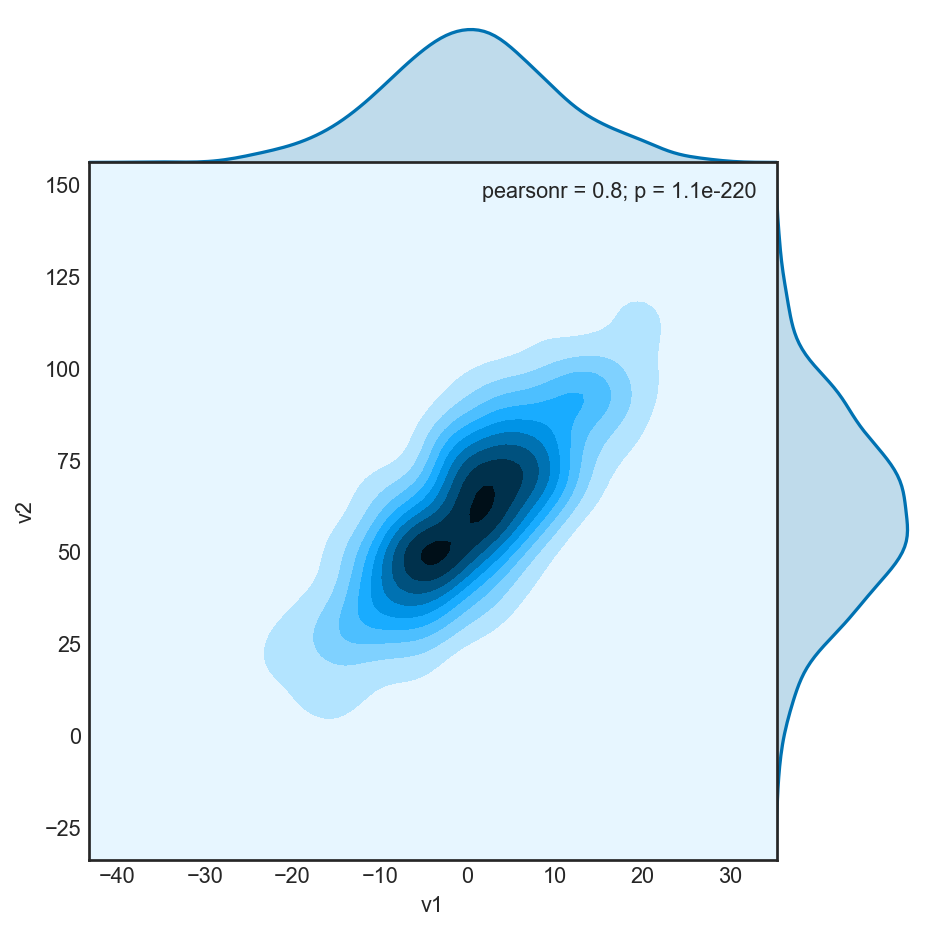

In [179]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

In [180]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Similar to pandas scatter_matrix, Seaborn has a built in function that creates a scatterplot matrix.

We pass in the iris dataframe. Then tell it to map categorical variable 'Name' to different colors using the 'hue' keyword. Finally, tell it to use 'kde' along the diagonals instead of the default histograms.

Looking at the pair plot, it's clear there are some clusters in the data set. It looks like peddle length and peddle width are good options for separating the observations, whereas sepal width is not a strong separator.

Using pair plot to look at your data frame can be a very useful tool in exploratory data analysis.

<IPython.core.display.Javascript object>


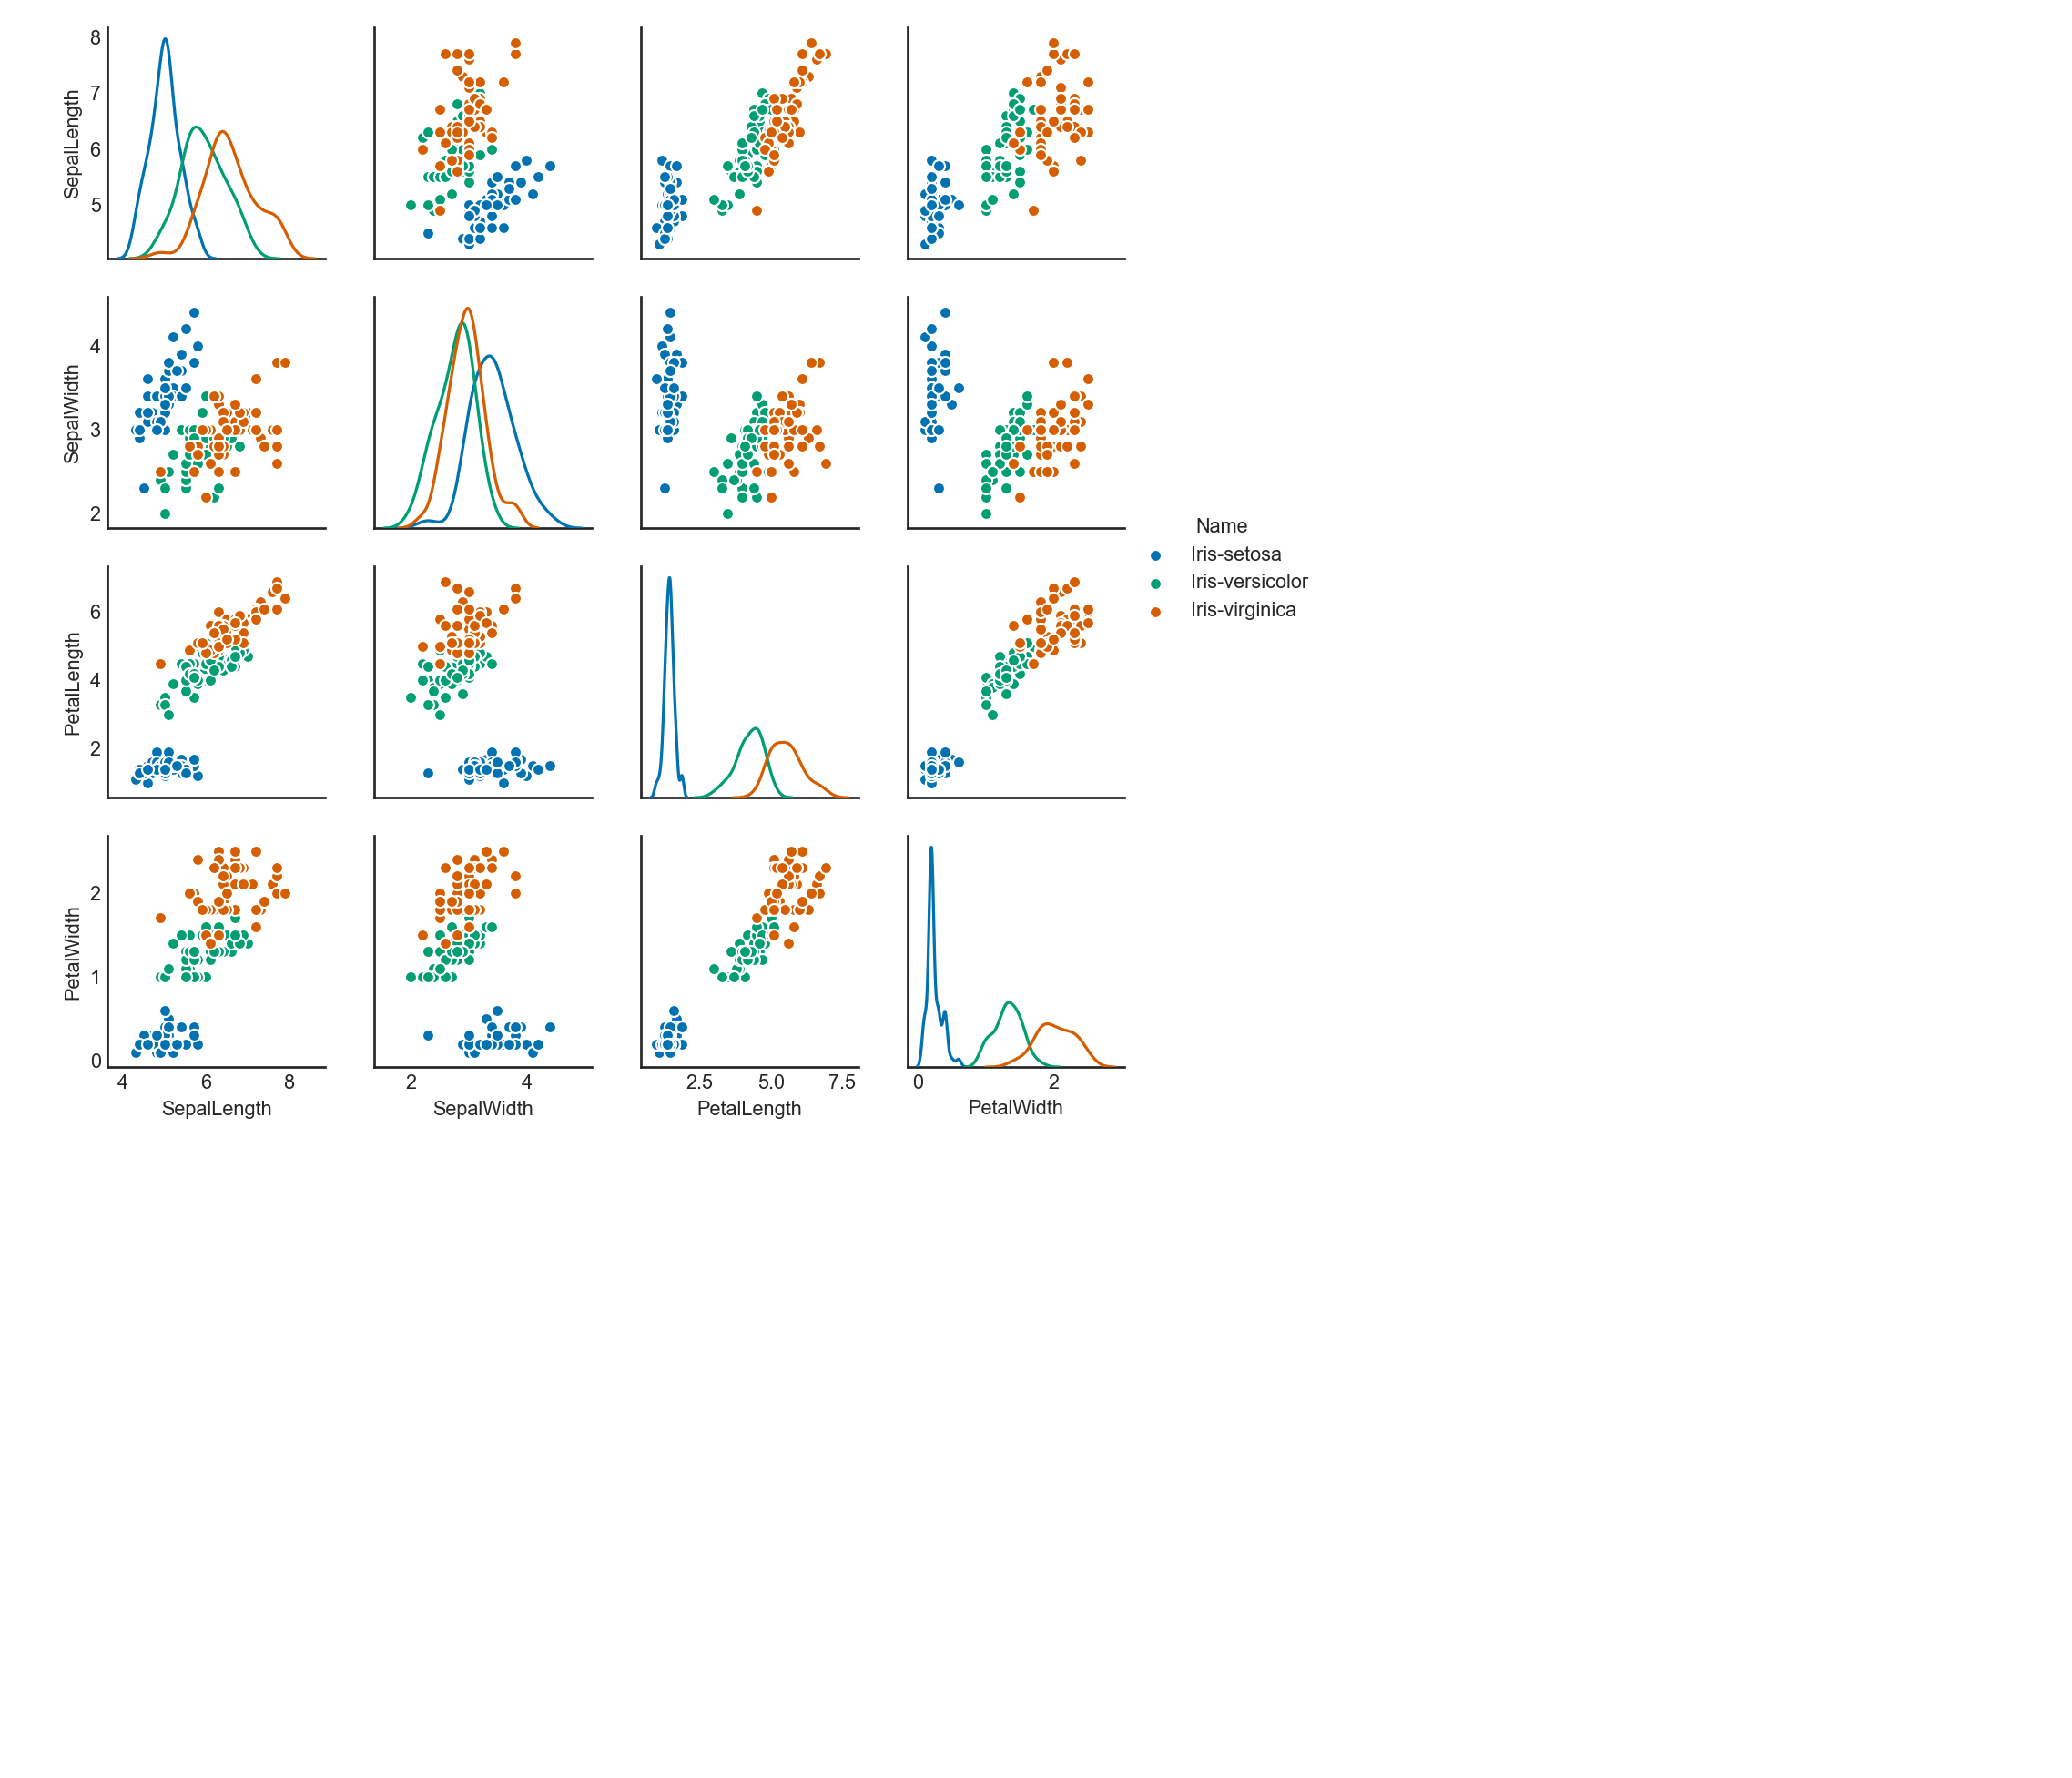

In [181]:
sns.pairplot(iris, hue='Name', diag_kind='kde', size=2);

One final plot I'd like to show you is called the violin plot.
You can think of a violin plot as a more informative version of a box plot. To demonstrate, let's plot a violin plot next to a swarm plot, which you can think of as a scatter plot for categorical data.

First let's create a new figure and a subplot.  Next, we'll create the swarmplot, passing in 'Name' and 'PetalLength', and the data, which is the iris data frame.

For the next subplot, we'll create the violinplot, again passing in 'Name', 'PetalLength' and the iris data frame.

Looking at the swarmplot, each species has its own column and each observation's petal length is shown. With more common values appearing as the wide parts of the cluster, much like a histogram.

The violinplot is like box plot with a rotated kernel density estimation on each side.

Violin plots convey more information than box plots and are able to show particular phenomena within the distribution that box plots are unable to convey such as multi modality.

<IPython.core.display.Javascript object>


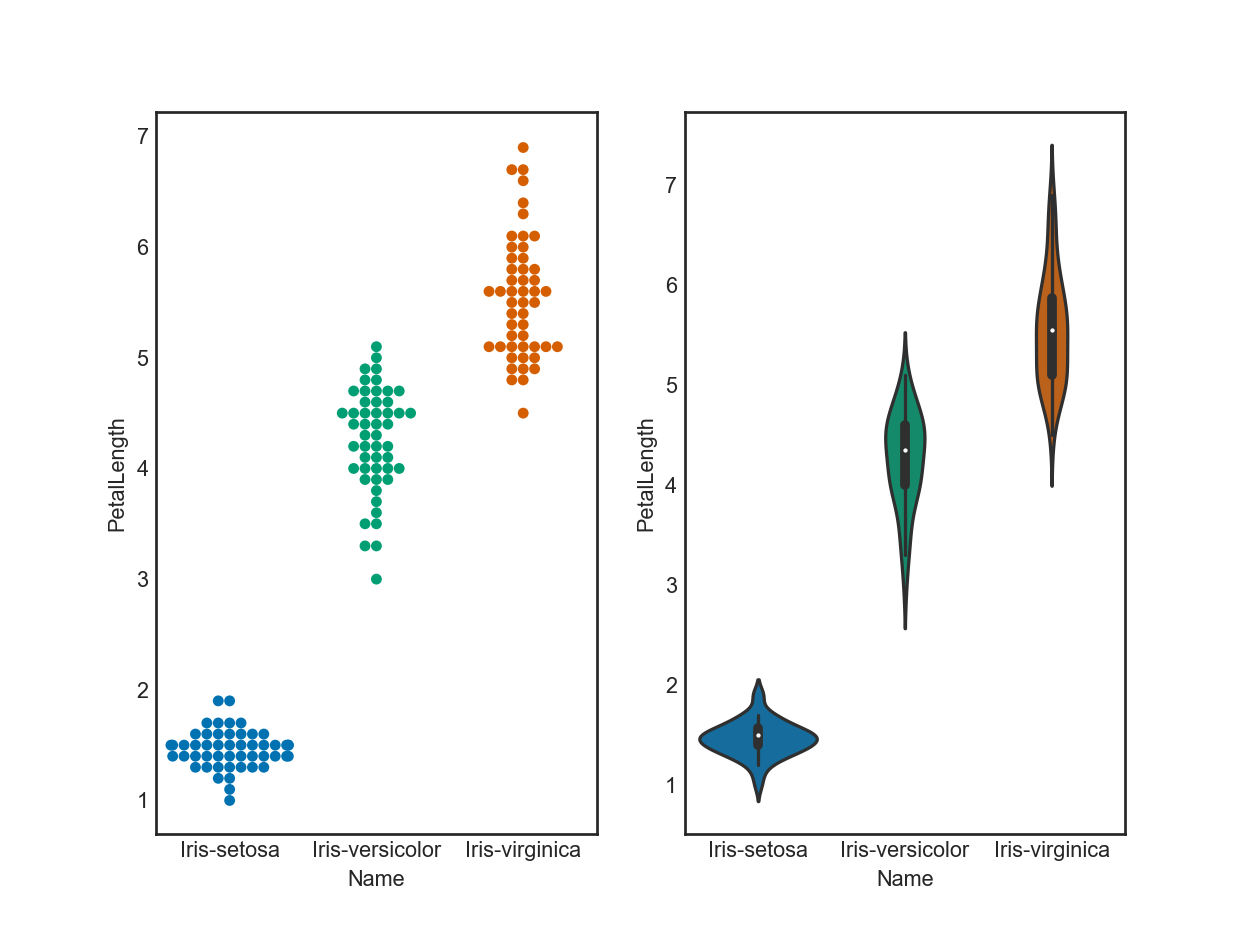

In [182]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);